In [1]:
#training K-Means and setting threshold
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

#read train data
data_path = r'C:\Users\name\OneDrive\Documents\Computer Science Masters\Independent Research Project\Summative Assessment\Artefact Directory\cnp_train_data.xlsx'
df_normal = pd.read_excel(data_path,sheet_name='Train')
X = df_normal.drop(['target'], axis=1)

#scale train data
scaler = MinMaxScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

#fit on train data
km = KMeans(n_clusters=2)
km.fit(scaled_X)

#predict on train data
pred_normal = km.predict(scaled_X)

#calculate threshold for each cluster
cluster0 = np.array(scaled_X)[pred_normal==0]
cluster1 = np.array(scaled_X)[pred_normal==1]
centroids = km.cluster_centers_
euc_res0 = euclidean_distances([centroids[0]], cluster0)[0]
euc_res1 = euclidean_distances([centroids[1]], cluster1)[0]
threshold0 = max(euc_res0)
threshold1 = max(euc_res1)

C:\Users\chenr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


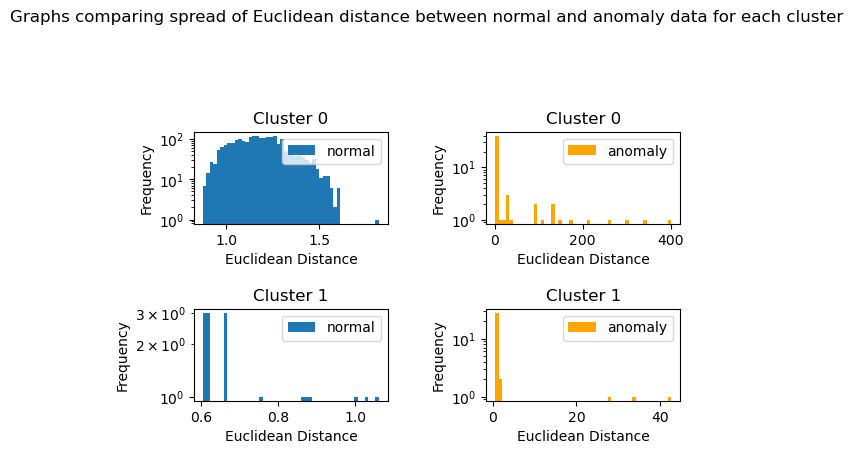

647
647
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2324
           1       0.08      0.54      0.13        91

    accuracy                           0.73      2415
   macro avg       0.53      0.64      0.49      2415
weighted avg       0.94      0.73      0.82      2415



In [2]:
#testing K-Means on test dataset

#read test data
data_path_test = r'C:\Users\name\OneDrive\Documents\Computer Science Masters\Independent Research Project\Summative Assessment\Artefact Directory\cnp_validation_data.xlsx'
df_hasanomalies = pd.read_excel(data_path_test,sheet_name='Validation')
X_test = df_hasanomalies.drop(['target'], axis=1)

#scale test data
scaled_X_test = scaler.transform(X_test)

#predict on test data
pred_clusters_test = km.predict(scaled_X_test)
pred0_indices = np.where(pred_clusters_test==0)[0]
pred1_indices = np.where(pred_clusters_test==1)[0]
#obtains each point in cluster 0
cluster0_test = np.array(scaled_X_test)[pred0_indices]
#obtains each point in cluster 1
cluster1_test = np.array(scaled_X_test)[pred1_indices]
#calculate euclidean distances of each point from its cluster centre
euc_res0_test = euclidean_distances([centroids[0]], cluster0_test)[0]
euc_res1_test = euclidean_distances([centroids[1]], cluster1_test)[0]

#euclidean distances separated by cluster and normal and anomaly
anomaly_indexes_c0 = [i for i,x in enumerate(np.array(df_hasanomalies['target'])[pred0_indices]) if x == 1]
normal_indexes_c0 = [i for i,x in enumerate(np.array(df_hasanomalies['target'])[pred0_indices]) if x == 0]
anomalies_c0 = [euc_res0_test[i] for i in anomaly_indexes_c0]
normal_c0 = [euc_res0_test[i] for i in normal_indexes_c0]

anomaly_indexes_c1 = [i for i,x in enumerate(np.array(df_hasanomalies['target'])[pred1_indices]) if x == 1]
normal_indexes_c1 = [i for i,x in enumerate(np.array(df_hasanomalies['target'])[pred1_indices]) if x == 0]
anomalies_c1 = [euc_res1_test[i] for i in anomaly_indexes_c1]
normal_c1 = [euc_res1_test[i] for i in normal_indexes_c1]

#plot graphs to visualize euclidean distance distrivution separating by cluster and normal vs anomaly
figure, axis = plt.subplots(2, 2)
figure.suptitle("Graphs comparing spread of Euclidean distance between normal and anomaly data for each cluster")
figure.tight_layout(pad=4.0)
axis[0][0].hist(normal_c0,bins=50,label='normal')
axis[0][0].set(xlabel="Euclidean Distance",ylabel="Frequency")
axis[0][0].title.set_text('Cluster 0')
axis[0][0].semilogy()
axis[0][0].legend(loc='upper right')
axis[0][1].hist(anomalies_c0,bins=50,label='anomaly',color='orange')
axis[0][1].set(xlabel="Euclidean Distance",ylabel="Frequency")
axis[0][1].title.set_text('Cluster 0')
axis[0][1].legend(loc='upper right')
axis[0][1].semilogy()
axis[1][0].hist(normal_c1,bins=50,label='normal')
axis[1][0].set(xlabel="Euclidean Distance",ylabel="Frequency")
axis[1][0].title.set_text('Cluster 1')
axis[1][0].legend(loc='upper right')
axis[1][0].semilogy()
axis[1][1].hist(anomalies_c1,bins=50,label='anomaly',color='orange')
axis[1][1].set(xlabel="Euclidean Distance",ylabel="Frequency")
axis[1][1].title.set_text('Cluster 1')
axis[1][1].legend(loc='upper right')
axis[1][1].semilogy()
plt.show()

#anomalies
anomalies0 = []
anomalies1 = []

#predicted list of zeros to be filled with anomalies (1) and non-anomaly (0)
pred_test = np.full(len(scaled_X_test),0)

#predict whether each point in cluster is normal or anomaly
for i in range(len(euc_res0_test)):
    if euc_res0_test[i]>threshold0-1.0:
        anomalies0.append(i)
        #replace point at index pred0_indices[i] with 1 to indicate anomaly
        np.put(pred_test,pred0_indices[i],1)
for i in range(len(euc_res1_test)):
    if euc_res1_test[i]>threshold1-1.0:
        anomalies1.append(i)
        #replace point at index pred1_indices[i] with 1 to indicate anomaly
        np.put(pred_test,pred1_indices[i],1)

#print results
print(len(anomalies0) + len(anomalies1))
print(list(pred_test).count(1))
print(classification_report(df_hasanomalies['target'], pred_test))

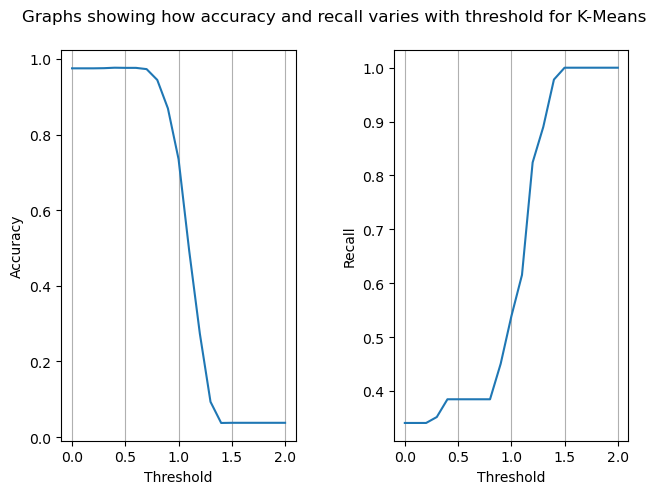

In [3]:
#Below code is used for threshold selection when adjusting threshold on test dataset

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score,accuracy_score

accuracy_recall = []

for i in range(0,21,1):
    pred_test = np.full(len(scaled_X_test),0)
    for j in range(len(euc_res0_test)):
        if euc_res0_test[j]>threshold0-(0.1*i):
            #replace point at index pred0_indices[i] with 1 to indicate anomaly
            np.put(pred_test,pred0_indices[j],1)
    for j in range(len(euc_res1_test)):
        if euc_res1_test[j]>threshold1-(0.1*i):
            #replace point at index pred1_indices[i] with 1 to indicate anomaly
            np.put(pred_test,pred1_indices[j],1)

    accuracy = accuracy_score(df_hasanomalies['target'], pred_test)
    recall = recall_score(df_hasanomalies['target'], pred_test)

    accuracy_recall.append([accuracy,recall])

x = [x/10 for x in list(range(0,21,1))]
y = accuracy_recall

figure, axis = plt.subplots(1, 2)
figure.suptitle("Graphs showing how accuracy and recall varies with threshold for K-Means")
figure.tight_layout(w_pad=4.0)
axis[0].plot(x,[pt[0] for pt in y])
axis[0].grid(axis = 'x')
axis[0].set(xlabel="Threshold",ylabel="Accuracy")
axis[1].plot(x,[pt[1] for pt in y])
axis[1].grid(axis = 'x')
axis[1].set(xlabel="Threshold",ylabel="Recall")
plt.show()